In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [181]:
df=pd.read_csv('heart.csv')
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


We have read the CSV file for the heart dataset into a dataframe

In [182]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have found out that there are no null values in the dataset that we have selected

In [183]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
df['Sex']=ordinal_encoder.fit_transform(df[['Sex']])
df['ChestPainType']=ordinal_encoder.fit_transform(df[['ChestPainType']])
df['RestingECG']=ordinal_encoder.fit_transform(df[['RestingECG']])
df['ExerciseAngina']=ordinal_encoder.fit_transform(df[['ExerciseAngina']])
df['ST_Slope']=ordinal_encoder.fit_transform(df[['ST_Slope']])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


We have preprocessed the dataframe and transformed the categorical data into a type that we can use to train our mode using the OrdinalEncoder() function 

<Axes: xlabel='Sex', ylabel='count'>

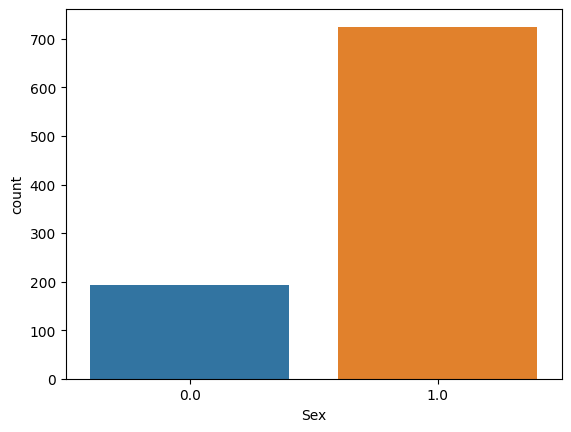

In [184]:
sns.countplot(data=df, x='Sex')

<Axes: xlabel='ChestPainType', ylabel='count'>

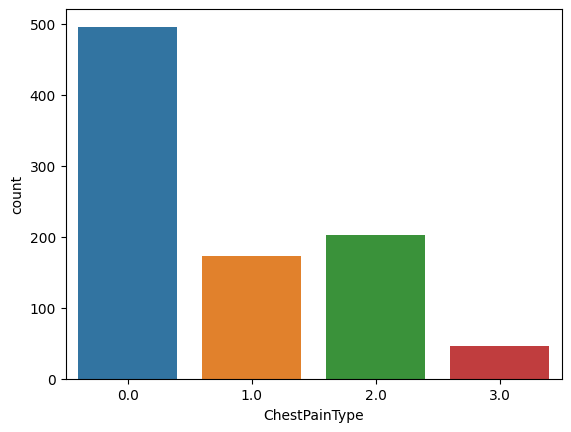

In [185]:
sns.countplot(data=df, x='ChestPainType')

<Axes: xlabel='FastingBS', ylabel='count'>

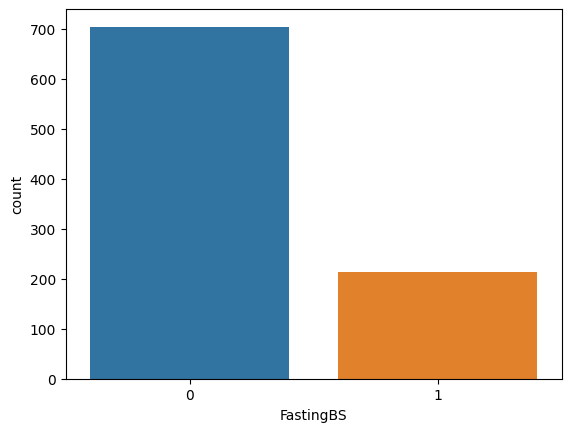

In [186]:
sns.countplot(data=df, x='FastingBS')

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

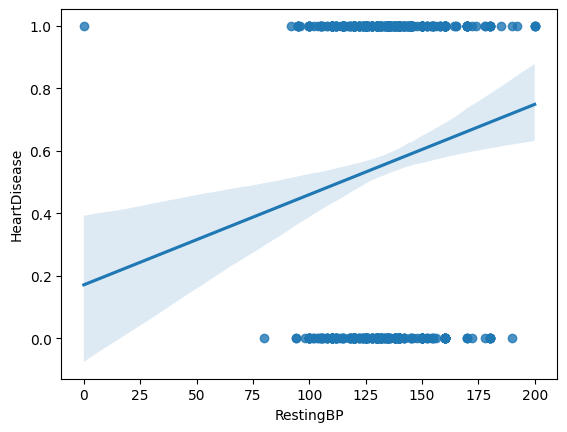

In [187]:
sns.regplot(data=df, x='RestingBP', y='HeartDisease')

<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

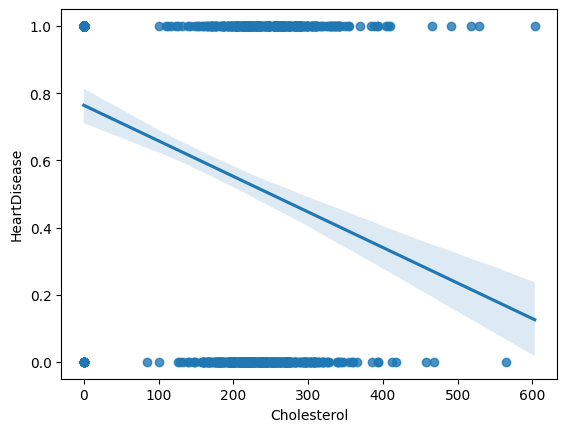

In [188]:
sns.regplot(data=df, x='Cholesterol', y='HeartDisease')

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = df.iloc[:,:10]
y = df.iloc[:,11]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
model

KNeighborsClassifier()

We have trained the model and split the dataframe in a train-test ratio of 0.75

In [190]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7130434782608696

In [191]:
new_pred1=model.predict([[40,1,1,140,289,0,1,172,0,0]])
print(new_pred1[0])
new_pred2=model.predict([[49,0,2,160,180,0,1,156,0,1]])
print(new_pred2[0])

0
0
